In [2]:
"""\
# Copyright (C) 2023 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 --version

Python 3.10.12


In [1]:
import numpy as np
import os
import sys

from tqdm import tqdm

# Graphic tool
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from gvf_inv.gvf_traj.gvf_traj_ellipse import gvf_ellipse
from gvf_inv.simulator import simulator

# --------------------------------------------------------------------------------------

E = np.array([[0, 1],[-1, 0]])

In [22]:
# Initial state of the robot
p0 = np.array([[1,0]])
v0 = np.array([4])
phi0 = np.array([0])

x0 = [p0,v0,phi0]

# Generate the trajectory to be followed
a, b = 10, 10
XYoff, alpha = [0, 0], 0

gvf_traj = gvf_ellipse(XYoff,alpha,a,b)

# Generating the simulator class
dt = 0.01

s = 1
ke = 2
kn = 4

sim = simulator(gvf_traj, x0=x0, dt=dt, s=s, ke=ke, kn=kn)

# ----------------------------------------------------------------------
# Execute the simulation given a desired final time stamp
# ----------------------------------------------------------------------
tf = 20

t_list = np.arange(0, tf, dt)
for it in tqdm(range(len(t_list))):
    sim.int_euler()

100%|██████████| 2000/2000 [00:00<00:00, 13661.07it/s]


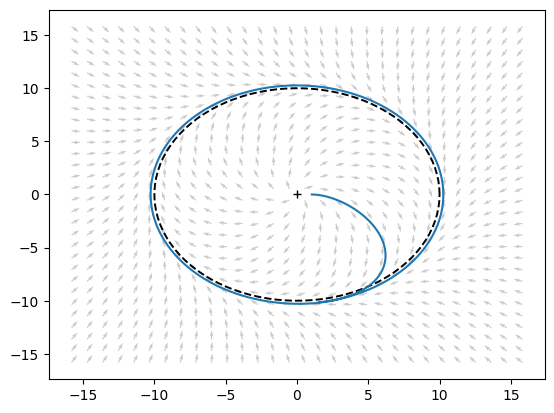

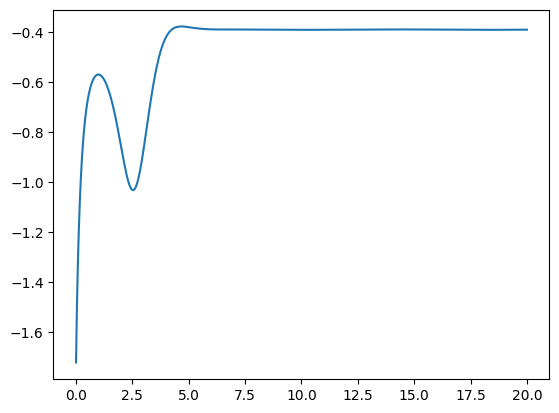

In [23]:
t_data = np.array(sim.data["t"])
p_data = np.array(sim.data["p"])
omega_data = np.array(sim.data["omega"])

# ----------------------------------------------------------------------

fig = plt.figure()
ax = fig.subplots()

gvf_traj.vector_field(XYoff, 1000, s, ke)
gvf_traj.draw(fig, ax, lw=1.4)

ax.plot(p_data[:,0,0], p_data[:,0,1])
plt.show()

# ----------------------------------------------------------------------

plt.plot(t_data, omega_data)
plt.show()